In [1]:
import numpy as np
import h5py
from nbodykit.lab import *
import nbodykit 
import matplotlib.pyplot as plt
import scipy.integrate

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

/Users/forero/anaconda3/envs/nbodykit-env/lib/python3.7/site-packages/nbodykit/extern/docrep.py:412: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  s = dedents(s)
/Users/forero/anaconda3/envs/nbodykit-env/lib/python3.7/site-packages/nbodykit/extern/docrep.py:341: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  s = dedents('\n' + '\n'.join(lines[first:]))


In [2]:
def power_spectrum(filename, L_side=0):
    print(filename)
    f = h5py.File(filename, 'r')
    divergence = f['divergence'][...]
    f.close()

    cosmo = cosmology.Planck15    
    f = cosmo.scale_independent_growth_rate(0.0)
    
    delta = -divergence/(100 * cosmo.h)
        
    delta_mesh = nbodykit.source.mesh.array.ArrayMesh(delta, L_side) 
    r = FFTPower(delta_mesh, mode='1d', dk=0.005, kmin=0.005)
    Pk = r.power

    return {'k': Pk['k'], 'Pk':(Pk['power'].real- Pk.attrs['shotnoise'])}

In [3]:
path = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/"
pk = {}
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    filename = "velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_{:.1f}_nside_360.hdf5".format(sigma)
    pk["300_{:.1f}".format(sigma)] = power_spectrum(path+filename, L_side=720.0)

/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_1.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_7.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_10.0_nside_360.hdf5


In [4]:
path = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/"
vels = [125.0, 180.0, 300.0]
for vel in vels:
    filename = "velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_{:.1f}_sigma_3.0_nside_360.hdf5".format(vel)
    pk["{}_3.0".format(int(vel))] = power_spectrum(path+filename, L_side=720.0)

/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_125.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_180.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_3.0_nside_360.hdf5


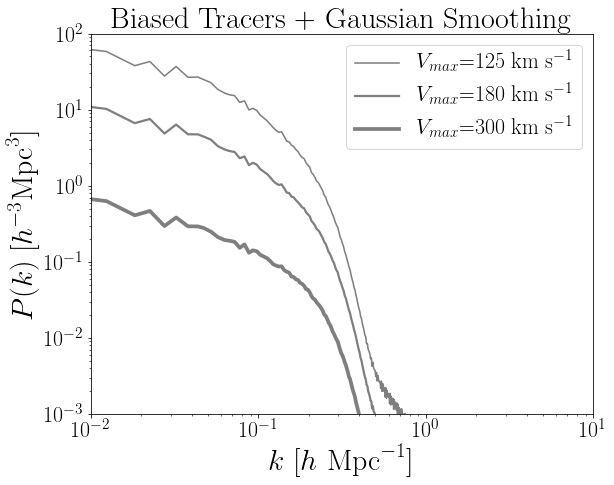

In [5]:
plt.figure(figsize=(9,7))

vels = [125.0, 180.0, 300.0]
for vel in vels:
    plt.loglog(pk["{}_3.0".format(int(vel))]['k'], 
               pk["{}_3.0".format(int(vel))]['Pk'], 
               label="$V_{{max}}$={:.0f} km s$^{{-1}}$".format(vel),
               linewidth=vel/80.0, color='black', alpha=0.5)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=SMALL_SIZE)
plt.xlim(1E-2, 10.0)
plt.ylim(1E-3, 1E2)
plt.title("Biased Tracers + Gaussian Smoothing ")

plt.savefig("plot_power_spectrum_tracers_vmax.pdf", bbox_inches='tight')

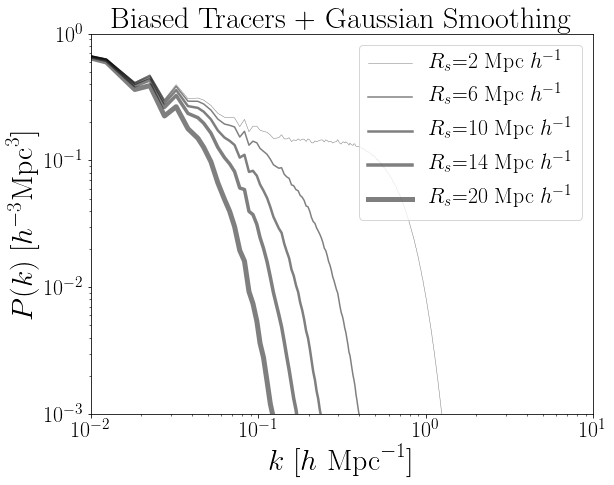

In [6]:
plt.figure(figsize=(9,7))

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    plt.loglog(pk['300_{:.1f}'.format(sigma)]['k'], 
               pk['300_{:.1f}'.format(sigma)]['Pk'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(2*sigma),
               linewidth=sigma/2.0, color='black', alpha=0.5)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1E-2, 10.0)
plt.ylim(1E-3,1E0)
plt.title("Biased Tracers + Gaussian Smoothing")
plt.savefig("plot_power_spectrum_tracers_rs.pdf", bbox_inches='tight')

In [7]:
path = "/Users/forero/github/WatershedAbacus/nb/"
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    filename = "mock_divergence_mesh_360_box_720_slim_{}.h5".format(int(2.0*sigma))
    pk["mock_720_{:.1f}".format(sigma)] = power_spectrum(path+filename, L_side=720.0)

/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_2.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_6.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_10.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_14.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_20.h5


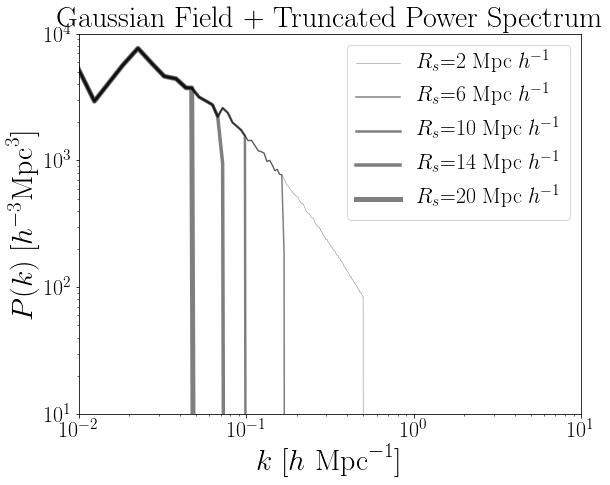

In [8]:
plt.figure(figsize=(9,7))

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    plt.loglog(pk['mock_720_{:.1f}'.format(sigma)]['k'], 
               pk['mock_720_{:.1f}'.format(sigma)]['Pk'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(2*sigma), 
              linewidth=sigma/2.0, color='black', alpha=0.5)


# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1E-2, 10.0)
plt.ylim(1E1,1E4)
plt.title("Gaussian Field + Truncated Power Spectrum")
plt.savefig("plot_power_spectrum_field_rs.pdf", bbox_inches='tight')

In [68]:
def corr_func(Pk, k):
    n_r = 1000
    r = np.linspace(0.1, 100.0, n_r)
    cf = np.zeros(n_r)
    for i in range(n_r):
        y = Pk[1:-1] * (k[1:-1]**2) * np.sin(k[1:-1]*r[i])/(k[1:-1]*r[i])
        x = k[1:-1]
        cf[i] = scipy.integrate.simps(y, x)
    cf = cf/(2.0*np.pi**2)
    
    i_min = np.argmin(np.abs(cf-cf[0]*0.5))
    half_r = r[i_min]
    #print(r[i_min])
    sigma_half_r = np.abs(r[i_min+1]-r[i_min-1])
    #sigma_half_r = 1.0
    print(cf[-1], cf[0], half_r)
    return {'cf':cf, 'r':r, 'half_r':half_r,'sigma_half_r':sigma_half_r}

In [69]:
cf = {}
for k in pk.keys():
    cf[k] = corr_func(pk[k]['Pk'], pk[k]['k'])

-1.8157482108559154e-08 0.0008691917255270592 3.0000000000000004
-1.1031075598527778e-08 2.0008845080812043e-05 9.6
-7.620520927273656e-09 4.853120636775035e-06 16.6
-4.170762813035821e-09 2.180219231571903e-06 22.400000000000002
2.6483549902827133e-09 1.0181517006338813e-06 28.000000000000004
-9.099557051359305e-07 0.0009923541426436948 11.4
-1.889489190772321e-07 0.0002132005145596088 10.700000000000001
-0.00019573412339535433 0.4598092543731556 6.5
0.0003833475477074434 0.10071317779943913 17.3
0.0006309955583344261 0.0413949320119937 27.200000000000003
-0.0006478137555081394 0.020165451453170807 37.5
-0.00036068976296431675 0.009326594360057679 51.6


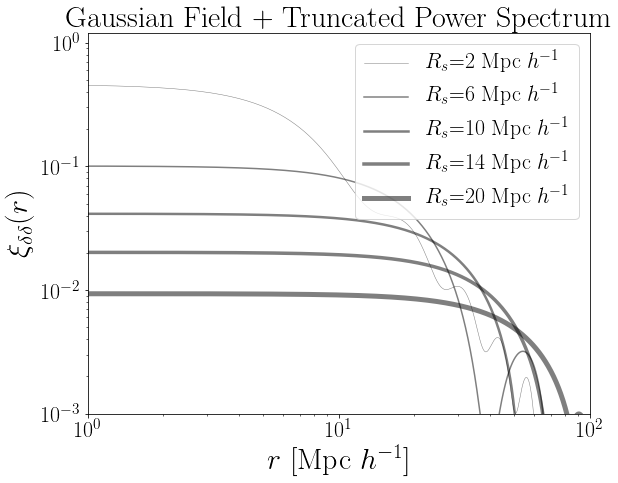

In [90]:
plt.figure(figsize=(9,7))

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    plt.loglog(cf['mock_720_{:.1f}'.format(sigma)]['r'], 
               cf['mock_720_{:.1f}'.format(sigma)]['cf'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(2*sigma), 
              linewidth=sigma/2.0, color='black', alpha=0.5)


# format the axes
plt.xlabel(r"$r$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"$\xi_{\delta\delta}(r)$")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1.0, 1E2)
plt.ylim(1E-3,1.2E0)
plt.title("Gaussian Field + Truncated Power Spectrum")
plt.savefig("plot_corrfunc_field_rs.pdf", bbox_inches='tight')

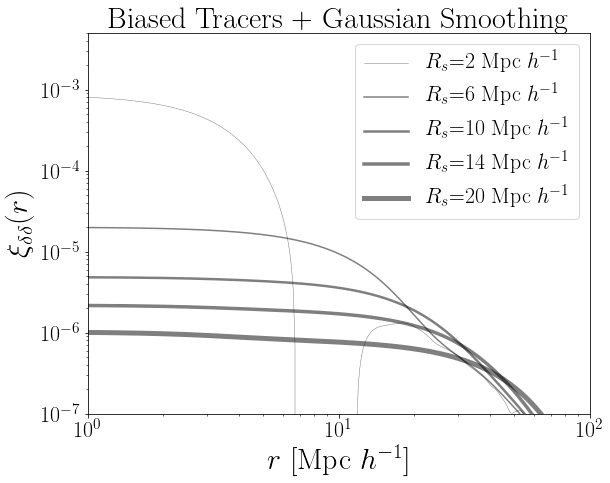

In [91]:
plt.figure(figsize=(9,7))

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    plt.loglog(cf['300_{:.1f}'.format(sigma)]['r'], 
               cf['300_{:.1f}'.format(sigma)]['cf'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(2*sigma),
               linewidth=sigma/2.0, color='black', alpha=0.5)

# format the axes
plt.xlabel(r"$r$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"$\xi_{\delta\delta}(r)$")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1, 1E2)
plt.ylim(1E-7,5E-3)
plt.title("Biased Tracers + Gaussian Smoothing")
plt.savefig("plot_corrfunc_tracers_rs.pdf", bbox_inches='tight')

In [92]:
for k in cf.keys():
    print(k, cf[k]['half_r'], cf[k]['sigma_half_r'])

300_1.0 3.0000000000000004 0.19999999999999973
300_3.0 9.6 0.20000000000000107
300_5.0 16.6 0.1999999999999993
300_7.0 22.400000000000002 0.1999999999999993
300_10.0 28.000000000000004 0.1999999999999993
125_3.0 11.4 0.1999999999999993
180_3.0 10.700000000000001 0.20000000000000107
mock_720_1.0 6.5 0.1999999999999993
mock_720_3.0 17.3 0.1999999999999993
mock_720_5.0 27.200000000000003 0.20000000000000284
mock_720_7.0 37.5 0.19999999999999574
mock_720_10.0 51.6 0.19999999999999574


In [93]:
half_r_sim = []
half_r_mock = []
sigma_half_r_sim = []
sigma_half_r_mock = []

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    half_r_mock.append(cf["mock_720_{:.1f}".format(sigma)]["half_r"])
    half_r_sim.append(cf["300_{:.1f}".format(sigma)]["half_r"])
    sigma_half_r_sim.append(cf["300_{:.1f}".format(sigma)]["sigma_half_r"])
    sigma_half_r_mock.append(cf["mock_720_{:.1f}".format(sigma)]["sigma_half_r"])

    
half_r_mock = np.array(half_r_mock)
half_r_sim = np.array(half_r_sim)
sigma_half_r_sim = np.array(sigma_half_r_sim)
sigma_half_r_mock = np.array(sigma_half_r_mock)

sigma_vals = 2.0*np.array(sigmas)

In [94]:
A = np.array([sigma_vals, half_r_mock, half_r_sim])
np.savetxt("correlation_length.dat", A.T, fmt="%.2f",
           header='R_s R_dd_gaussian_field R_dd_biased_tracers')

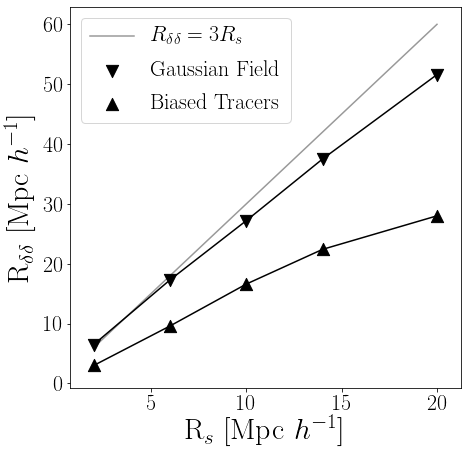

In [95]:
plt.figure(figsize=(7,7))

plt.scatter(sigma_vals, half_r_mock, marker="v", s=150, label="Gaussian Field", color='black')
plt.plot(sigma_vals, half_r_mock, color='black')
#plt.errorbar(sigma_vals, half_r_mock, yerr=sigma_half_r_mock, color='black', capsize=10)


plt.scatter(sigma_vals, half_r_sim, marker="^", s=150, label="Biased Tracers", color='black')
plt.plot(sigma_vals, half_r_sim, color='black')
#plt.errorbar(sigma_vals, half_r_sim, yerr=sigma_half_r_sim, color='black', capsize=10)


plt.plot(sigma_vals, 3*sigma_vals, color='black', label='$R_{\delta\delta}=3R_{s}$', alpha=0.4)

#plt.semilogy()
#plt.xlim(0,22)
#plt.ylim(0,32)
plt.legend(fontsize=SMALL_SIZE)
plt.xlabel(r"R$_s$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"R$_{\delta\delta}$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.savefig("correlation_length.pdf", bbox_inches='tight')

In [220]:
#https://cluster-toolkit.readthedocs.io/en/latest/source/correlation_functions.html